In [1]:
import numpy as np
import tensorflow as tf

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.constraints import MaxNorm as maxnorm
from keras.optimizers import SGD
from keras.utils import to_categorical
# Load Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalize inputs
X_train = X_train / 255.0
X_test = X_test / 255.0
# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# Create Model
model = Sequential()
model.add(Conv2D(32, (3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same',
                 kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3),
                 activation='relu',
                 padding='same',
                 kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,
                activation='relu',
                kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
epochs = 25
lrate = 0.01
# FIXED OPTIMIZER LINE
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

print(model.summary())
# Train Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    batch_size=32)
# Evaluate Model
scores = model.evaluate(X_test, y_test, verbose=0)

print("\nAccuracy: %.2f%%" % (scores[1]*100))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3029 - loss: 1.9113 - val_accuracy: 0.4746 - val_loss: 1.4349
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4923 - loss: 1.4175 - val_accuracy: 0.5613 - val_loss: 1.2341
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5678 - loss: 1.2074 - val_accuracy: 0.6000 - val_loss: 1.1309
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6215 - loss: 1.0621 - val_accuracy: 0.6066 - val_loss: 1.1133
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6690 - loss: 0.9337 - val_accuracy: 0.6280 - val_loss: 1.0510
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7029 - loss: 0.8413 - val_accuracy: 0.6588 - val_loss: 1.0005
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7339 - loss: 0.7539 - val_accuracy: 0.6819 - val_loss: 0.9461
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7632 - loss: 0.

In [2]:
model = Sequential()

# Block 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Block 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Block 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Dense layers
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

from keras.optimizers import SGD

sgd = SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)
# Evaluate model on test data
scores = model.evaluate(X_test, y_test, verbose=0)

print("\nFinal Test Accuracy: %.2f%%" % (scores[1] * 100))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.2311 - loss: 2.0556 - val_accuracy: 0.4220 - val_loss: 1.5907
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4577 - loss: 1.4782 - val_accuracy: 0.5269 - val_loss: 1.3119
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5564 - loss: 1.2356 - val_accuracy: 0.6171 - val_loss: 1.0751
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6213 - loss: 1.0627 - val_accuracy: 0.6653 - val_loss: 0.9524
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6688 - loss: 0.9417 - val_accuracy: 0.6829 - val_loss: 0.9203
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6998 - loss: 0.8626 - val_accuracy: 0.7298 - val_loss: 0.7900
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7259 - loss: 0.7740 - val_accuracy: 0.7163 - val_loss: 0.8263
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7446 - loss: 0.7285 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
Image 1
Predicted: cat
Actual: cat
Result: YES (Correct Prediction)
----------------------


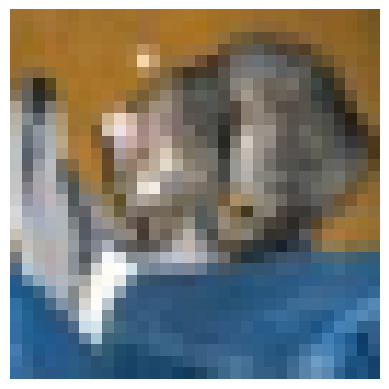

Image 2
Predicted: ship
Actual: ship
Result: YES (Correct Prediction)
----------------------


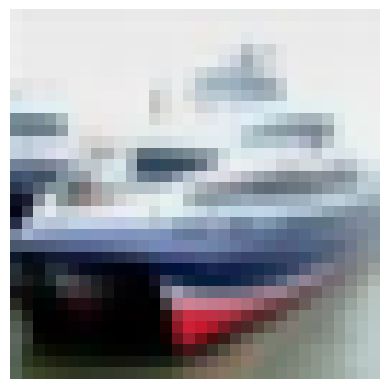

Image 3
Predicted: ship
Actual: ship
Result: YES (Correct Prediction)
----------------------


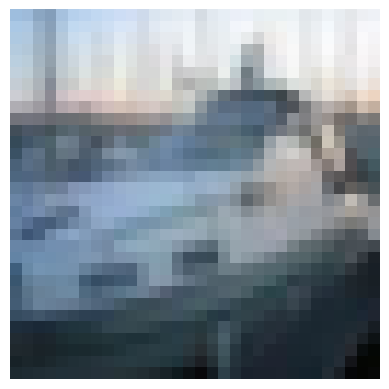

Image 4
Predicted: airplane
Actual: airplane
Result: YES (Correct Prediction)
----------------------


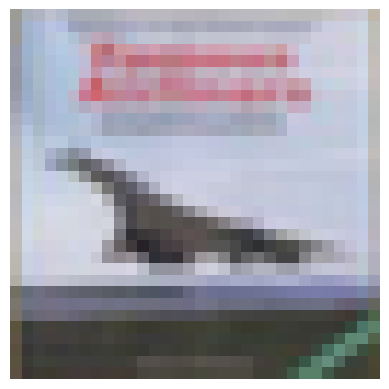

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Predict first 4 test images
predictions = model.predict(X_test[:4])

for i in range(4):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(y_test[i])

    print("Image", i+1)
    print("Predicted:", class_names[predicted_label])
    print("Actual:", class_names[actual_label])

    if predicted_label == actual_label:
        print("Result: YES (Correct Prediction)")
    else:
        print("Result: NO (Wrong Prediction)")

    print("----------------------")

    plt.imshow(X_test[i])
    plt.axis('off')
    plt.show()


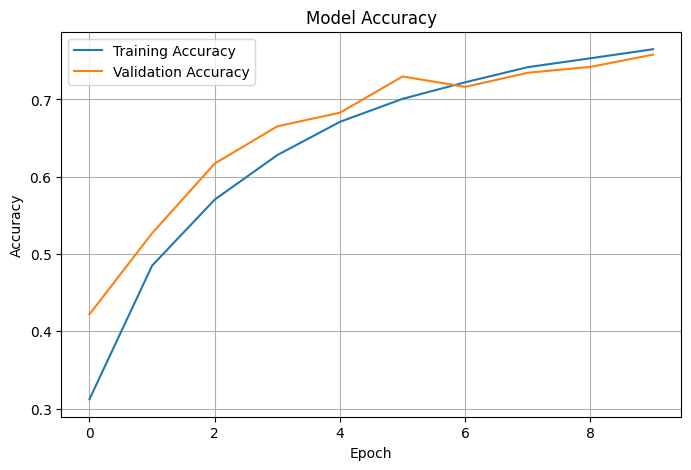

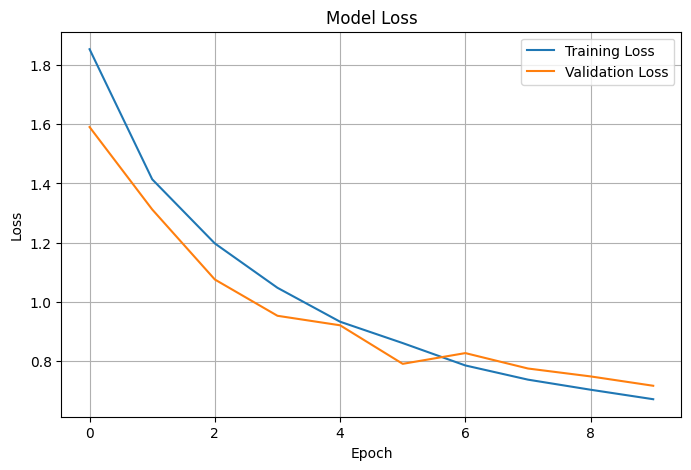

In [4]:
import matplotlib.pyplot as plt

# -------- Accuracy Graph --------
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.show()


# -------- Loss Graph --------
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()
